<a href="https://colab.research.google.com/github/mohammedfaizan3103/ML-pracitice/blob/main/ML_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Week - 3

## Dataset - 1 Titanic

## Preprocessing

In [2]:
df = pd.read_csv("/content/drive/MyDrive/ML-lab/Datasets/titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print("Shape:", df.shape)
print("Data Types: ")
df.dtypes

Shape: (891, 12)
Data Types: 


,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [6]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [7]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [8]:
df['Sex'].value_counts()
df['Sex'] = np.where(df.Sex == 'male', 1, 0)
df.dtypes


,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,int64
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [9]:
df['Sex']

,Sex
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [10]:
ordinal_label = {k: i for i, k in enumerate(df['Embarked'].unique(), 0)}
df['Embarked'] = df['Embarked'].map(ordinal_label)

In [11]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,int64
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [12]:
df.drop(labels=['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)

In [13]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Sex,int64
Age,float64
SibSp,int64
Parch,int64
Fare,float64
Embarked,int64


In [14]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


## Constant Features

In [15]:
constant_features = [
    features for features in df.columns if df[features].std() == 0
]
print(f"Number of constant features: {len(constant_features)}")

Number of constant features: 0


## Quasi Constant Features

In [16]:
quasi_constant_features = []
for feature in df.columns:
    predominant = (df[feature].value_counts() / len(df)).sort_values(ascending=False).values[0]
    if predominant > 0.9:
        quasi_constant_features.append(feature)

print(f"Number of Quasi Constant Features: {len(quasi_constant_features)}")

Number of Quasi Constant Features: 0


## Duplicated Features

In [17]:
duplicated_feat = []

for i in range(len(df.columns)):
    col_1 = df.columns[i]
    for col_2 in df.columns[i + 1:]:
        if df[col_1].equals(df[col_2]):
            duplicated_feat.append(col_2)

print("Duplicated features:", duplicated_feat)

Duplicated features: []


## Correlated Features

<Axes: >

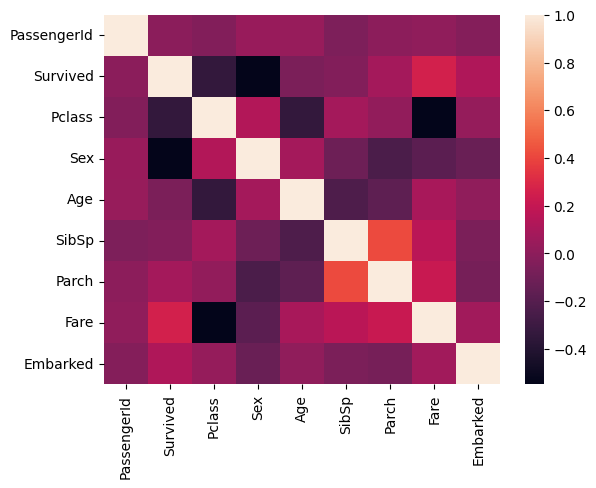

In [18]:
corrmat = df.corr()
sns.heatmap(corrmat)

In [19]:
def correlation(dataset, threshold):
    col_corr = set()
    matrix = dataset.corr()
    for i in range(len(matrix.columns)):
        for j in range(i):
            if abs(matrix.iloc[i, j]) > threshold:
                colname = matrix.columns[i]
                col_corr.add(colname)
    return col_corr

corr_features = correlation(df, 0.9)
correlated = set(corr_features)
correlated

set()

In [20]:
y = df['Survived']
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [21]:
X = df.drop(labels='Survived', axis=1)
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.0,1,0,7.2500,0
1,2,1,0,38.0,1,0,71.2833,1
2,3,3,0,26.0,0,0,7.9250,0
3,4,1,0,35.0,1,0,53.1000,0
4,5,3,1,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,887,2,1,27.0,0,0,13.0000,0
887,888,1,0,19.0,0,0,30.0000,0
888,889,3,0,28.0,1,2,23.4500,0
889,890,1,1,26.0,0,0,30.0000,1


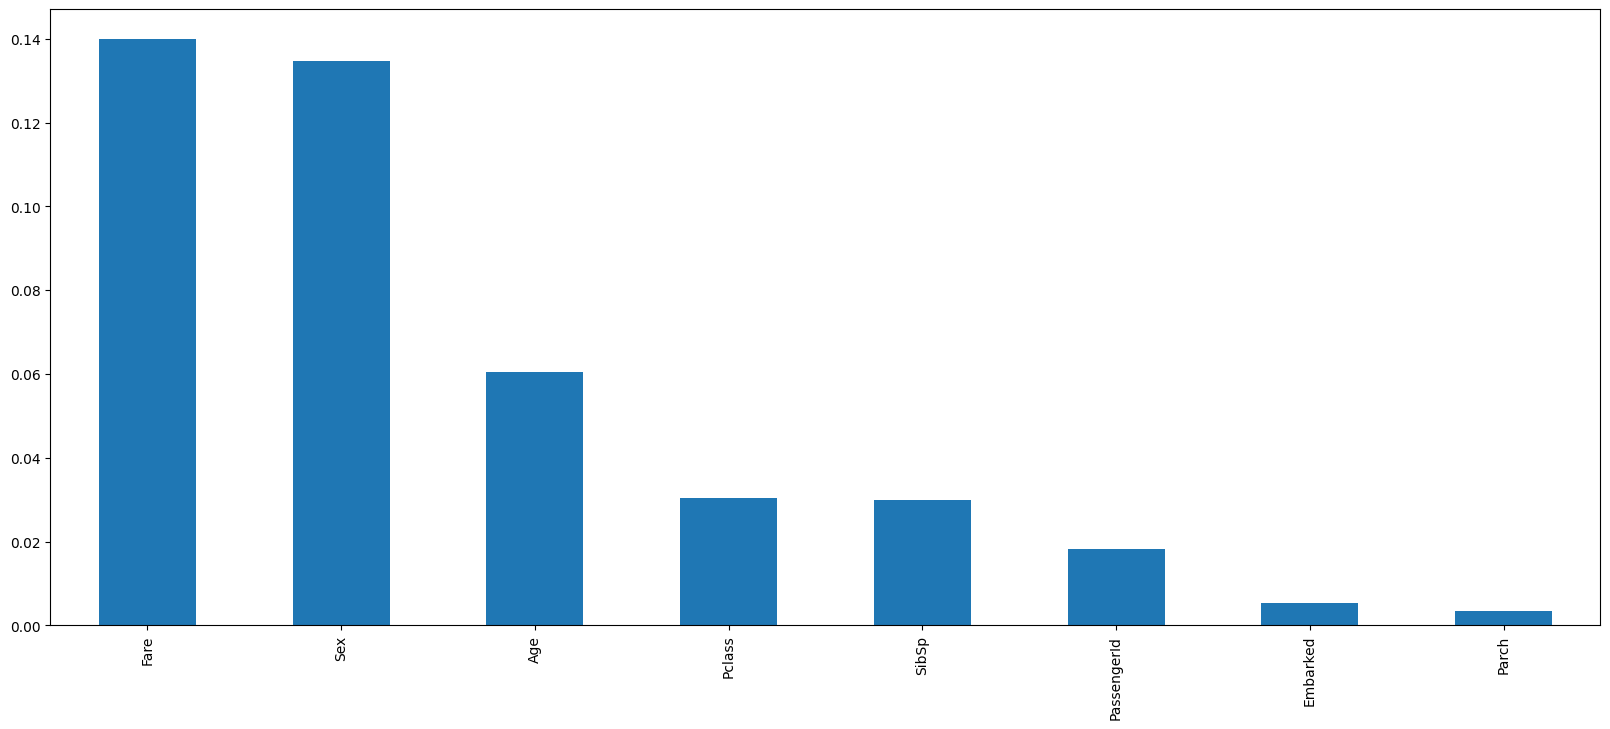

In [22]:
from sklearn.feature_selection import mutual_info_classif


mi = mutual_info_classif(X.fillna(0), y)
mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi.sort_values(ascending=False).plot.bar(figsize=(20, 8))
plt.show()

In [23]:
selected_features = mi[mi > 0.0001].index.tolist()
print(f"Number of Selected Features: {len(selected_features)}")
print(f"Selected Features: {(selected_features)}")

Number of Selected Features: 8
Selected Features: ['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']


In [24]:
X = X[selected_features]
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.0,1,0,7.2500,0
1,2,1,0,38.0,1,0,71.2833,1
2,3,3,0,26.0,0,0,7.9250,0
3,4,1,0,35.0,1,0,53.1000,0
4,5,3,1,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,887,2,1,27.0,0,0,13.0000,0
887,888,1,0,19.0,0,0,30.0000,0
888,889,3,0,28.0,1,2,23.4500,0
889,890,1,1,26.0,0,0,30.0000,1


## Chi-2 Test

In [25]:
from sklearn.feature_selection import chi2

f_score = chi2(X, y)
f_score

(array([3.31293407e+00, 3.08736994e+01, 9.27024470e+01, 2.16491630e+01,
        2.58186538e+00, 1.00974991e+01, 4.51831909e+03, 1.41242569e+01]),
 array([6.87366651e-02, 2.75378563e-08, 6.07783826e-22, 3.27352826e-06,
        1.08094210e-01, 1.48470676e-03, 0.00000000e+00, 1.71122816e-04]))

In [26]:
p_values = pd.Series(f_score[1])
p_values.index = X.columns
p_values.sort_values(ascending = True)

,0
Fare,0.000000e+00
Sex,6.077838e-22
Pclass,2.753786e-08
Age,3.273528e-06
Embarked,1.711228e-04
Parch,1.484707e-03
PassengerId,6.873667e-02
SibSp,1.080942e-01


In [27]:
p_values[p_values < 0.05].sort_values(ascending=True)

,0
Fare,0.000000e+00
Sex,6.077838e-22
Pclass,2.753786e-08
Age,3.273528e-06
Embarked,1.711228e-04
Parch,1.484707e-03


## Anova

In [28]:
from sklearn.feature_selection import f_classif
f_score, p_value = f_classif(X, y)

print("F-scores:", f_score)
print("p-values:", p_value)


F-scores: [2.22848123e-02 1.15031272e+02 3.72405724e+02 3.76152805e+00
 1.11057220e+00 5.96346384e+00 6.30307642e+01 1.25588673e+01]
p-values: [8.81365777e-01 2.53704739e-25 1.40606613e-69 5.27606885e-02
 2.92243929e-01 1.47992454e-02 6.12018934e-15 4.14874835e-04]


Text(0.5, 1.0, 'Anova')

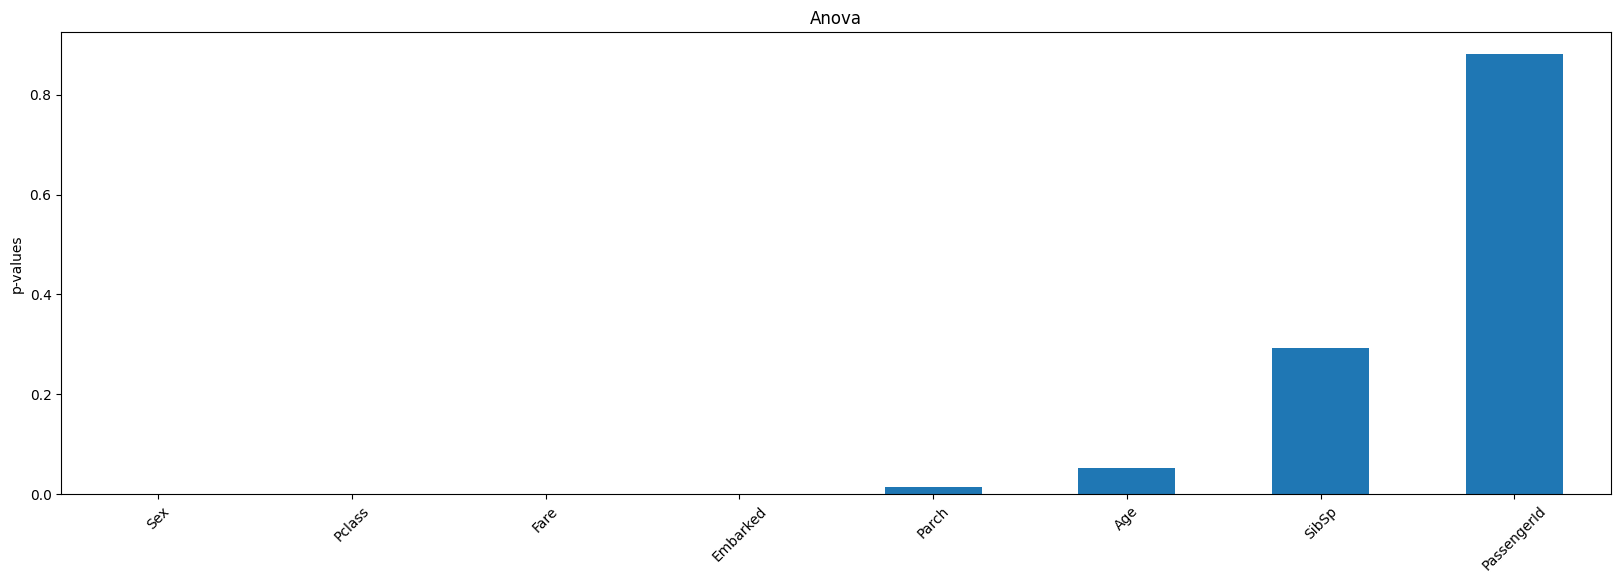

In [29]:
p_values = pd.Series(p_value)
p_values.index = X.columns
p_values.sort_values(ascending=True).plot.bar(figsize=(20, 6), rot=45)
plt.ylabel("p-values")
plt.title("Anova")

In [30]:
p_values.sort_values(ascending=True)

,0
Sex,1.406066e-69
Pclass,2.537047e-25
Fare,6.120189e-15
Embarked,4.148748e-04
Parch,1.479925e-02
Age,5.276069e-02
SibSp,2.922439e-01
PassengerId,8.813658e-01


In [31]:
p_values[p_values > 0.05]

,0
PassengerId,0.881366
Age,0.052761
SibSp,0.292244


### roc-auc

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

roc_values = []
for feature in X.columns:
    clf = DecisionTreeClassifier()
    clf.fit(X[feature].fillna(0).to_frame(), y)
    y_scored = clf.predict_proba(X[feature].fillna(0).to_frame())
    roc_values.append(roc_auc_score(y, y_scored[:, 1]))

roc_values = pd.Series(roc_values)
roc_values.index = X.columns
roc_values.sort_values(ascending=False)


,0
PassengerId,1.000000
Fare,0.896731
Sex,0.766873
Age,0.691441
Pclass,0.681417
SibSp,0.596539
Embarked,0.577935
Parch,0.577248


In [33]:
roc_values[roc_values > 0.5]

,0
PassengerId,1.000000
Pclass,0.681417
Sex,0.766873
Age,0.691441
SibSp,0.596539
Parch,0.577248
Fare,0.896731
Embarked,0.577935


## Wrapper Methods

### Forward Selection

In [34]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import  RandomForestClassifier
print(X.columns)
sfs1 = SFS(
    RandomForestClassifier(n_jobs=4),
    k_features=7,
    forward=True,
    floating=False,
    verbose=2,
    scoring='roc_auc',
    cv=3
)
sfs1 = sfs1.fit(np.array(X.fillna(0)), y)


Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   14.1s finished

[2025-08-28 15:33:43] Features: 1/7 -- score: 0.7668727830505224[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    9.6s finished

[2025-08-28 15:33:53] Features: 2/7 -- score: 0.8286917201930143[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.8s finished

[2025-08-28 15:33:59] Features: 3/7 -- score: 0.8374316939890711[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.9s finished

[2025-08-28 15:34:03] Features: 4/7 -- score: 0.8402118684689865[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.0s finished

[2025-08-28 15:34:07] Features: 5/7 -- score: 0.8242178762023457[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.5s finished

[2025-08-28 15:34:10] Features: 6/7 -- score: 0.838534176972486[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s finished

[2025-08-28 15:34:12] Features: 7/7 -- score: 0.8573882337903046

In [35]:
selected_feature_names = [X.columns[i] for i in sfs1.k_feature_idx_]

# Print the best accuracy score, indices, and feature names
print('Best accuracy score: %.2f' % sfs1.k_score_)
print('Best subset (indices):', sfs1.k_feature_idx_)
print('Best subset (corresponding names):', selected_feature_names)

Best accuracy score: 0.86
Best subset (indices): (0, 1, 2, 3, 5, 6, 7)
Best subset (corresponding names): ['PassengerId', 'Pclass', 'Sex', 'Age', 'Parch', 'Fare', 'Embarked']


In [36]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import  RandomForestClassifier
print(X.columns)
sfs2 = SFS(
    RandomForestClassifier(n_jobs=4),
    k_features=7,
    forward=False,
    floating=False,
    verbose=3,
    scoring='accuracy',
    cv=3
)
sfs2 = sfs2.fit(np.array(X.fillna(0)), y)


Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    7.8s finished

[2025-08-28 15:34:20] Features: 7/7 -- score: 0.8170594837261506

In [37]:
selected_feature_names = [X.columns[i] for i in sfs2.k_feature_idx_]

# Print the best accuracy score, indices, and feature names
print('Best accuracy score: %.2f' % sfs2.k_score_)
print('Best subset (indices):', sfs2.k_feature_idx_)
print('Best subset (corresponding names):', selected_feature_names)

Best accuracy score: 0.82
Best subset (indices): (0, 1, 2, 3, 4, 6, 7)
Best subset (corresponding names): ['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked']


Week 4

## Linear Regression

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


In [54]:
df = pd.read_csv("/content/drive/MyDrive/ML-lab/Datasets/house_price_train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [55]:
df.shape

(1460, 81)

In [56]:
num_cols = df.select_dtypes(include=["float64", "int64"]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
print(df.isnull().sum())

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


In [57]:
df = pd.get_dummies(df, drop_first=True)

In [58]:
df.dtypes

,0
Id,int64
MSSubClass,int64
LotFrontage,float64
LotArea,int64
OverallQual,int64
...,...
SaleCondition_AdjLand,bool
SaleCondition_Alloca,bool
SaleCondition_Family,bool
SaleCondition_Normal,bool


In [59]:
bool_cols = df.select_dtypes(include=["bool", "uint8", "int8"]).columns
df[bool_cols] = df[bool_cols].fillna(0)

In [60]:
print(df.isnull().sum())

Id                       0
MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 246, dtype: int64


In [61]:
X = df[['YearBuilt']]
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

simple_linear = LinearRegression()
simple_linear.fit(X_train, y_train)

y_predict = simple_linear.predict(X_test)

mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
rmse = np.sqrt(mse)

print("Simple Linear Regression Evaluation:")
print("MSE :", mse)
print("MAE :", mae)
print("RMSE:", rmse)


Simple Linear Regression Evaluation:
MSE : 5447834477.467489
MAE : 51148.46731516804
RMSE: 73809.44707466307


In [62]:
print("Intercept (b0):", simple_linear.intercept_)
print("Slope (b1):", simple_linear.coef_[0])


Intercept (b0): -2382648.9153812435
Slope (b1): 1300.9310044469596


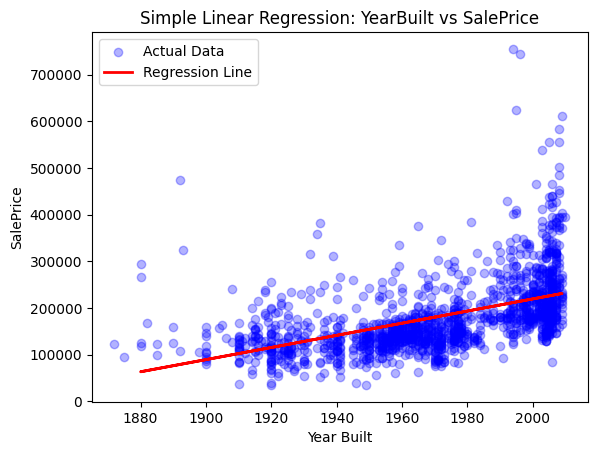

In [63]:
import matplotlib.pyplot as plt

plt.scatter(X, y, color='blue', alpha=0.3, label='Actual Data')

plt.plot(X_test, y_predict, color='red', linewidth=2, label='Regression Line')

plt.xlabel('Year Built')
plt.ylabel('SalePrice')
plt.title('Simple Linear Regression: YearBuilt vs SalePrice')
plt.legend()
plt.show()


In [49]:
from sklearn.metrics import mean_absolute_error

X = df.drop(["Id", "SalePrice"], axis=1)
y = df["SalePrice"]

bool_cols = X.select_dtypes(include=["bool"]).columns
X[bool_cols] = X[bool_cols].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

y_pred = multi_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
mae = mean_absolute_error(y_test, y_pred)

print("Multiple Linear Regression Results")
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)



Multiple Linear Regression Results
MSE: 2426338373.9937477
RMSE: 49257.87626353523
MAE: 20485.454124392403


In [50]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("Intercept (b0):", multi_model.intercept_)

for feature, coef in zip(X.columns, multi_model.coef_):
    print(f"Slope for {feature}: {coef}")




Intercept (b0): -584048.4418402527
Slope for MSSubClass: 26.127118520298414
Slope for LotFrontage: 4.844641009614
Slope for LotArea: 0.6654864522158448
Slope for OverallQual: 6385.81314588508
Slope for OverallCond: 5928.744392963631
Slope for YearBuilt: 353.4714508982954
Slope for YearRemodAdd: 121.5858485447531
Slope for MasVnrArea: 22.113226004091615
Slope for BsmtFinSF1: 16.69419147370178
Slope for BsmtFinSF2: 9.156220050606976
Slope for BsmtUnfSF: -0.662498384690025
Slope for TotalBsmtSF: 25.187301626044245
Slope for 1stFlrSF: 15.148545908035771
Slope for 2ndFlrSF: 32.78424049295654
Slope for LowQualFinSF: -24.913480642851027
Slope for GrLivArea: 23.019548373335965
Slope for BsmtFullBath: 1913.322898202292
Slope for BsmtHalfBath: -2824.686112510665
Slope for FullBath: 2815.846551875623
Slope for HalfBath: 1741.0070377918173
Slope for BedroomAbvGr: -2546.588228554266
Slope for KitchenAbvGr: -13776.710871335734
Slope for TotRmsAbvGrd: 2164.1356987604977
Slope for Fireplaces: 3987.368

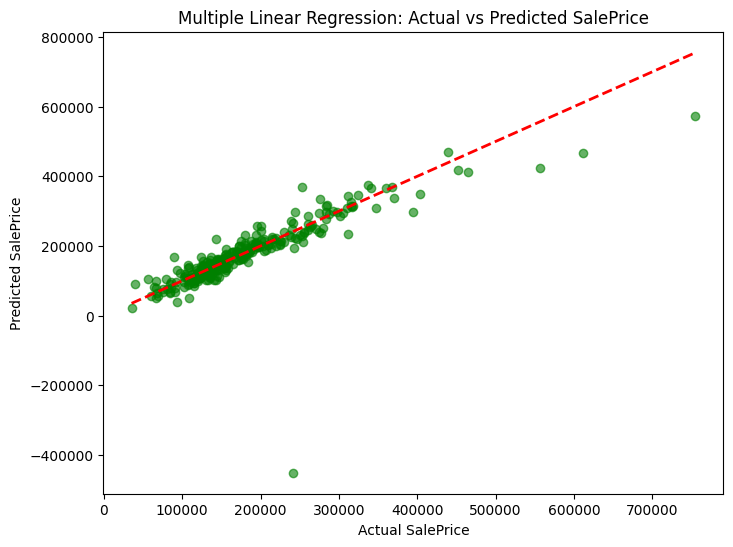

In [51]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Multiple Linear Regression: Actual vs Predicted SalePrice")
plt.show()

## Polynomial Linear regression

In [83]:
df = pd.read_csv("/content/drive/MyDrive/ML-lab/Datasets/position_salaries.csv")
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [84]:
X = df[['Level']].values
y = df['Salary'].values

In [94]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(X)

poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

y_predict = poly_reg.predict(poly.transform(X))

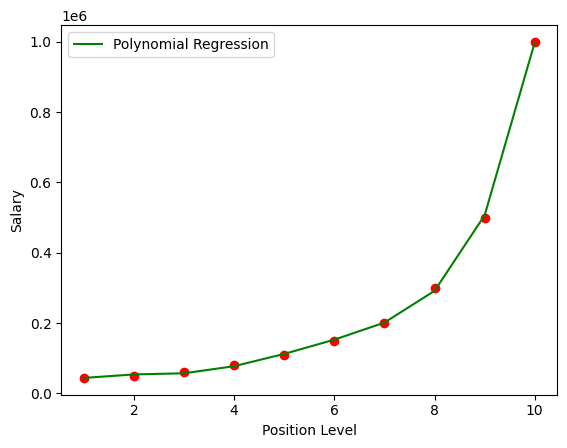

In [95]:
plt.scatter(X, y, color='red')
plt.plot(X, y_predict, color='green', label="Polynomial Regression")

plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.legend()
plt.show()

## Logistic Regression

In [64]:
df = pd.read_csv("/content/drive/MyDrive/ML-lab/Datasets/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [65]:
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [66]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [67]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]


In [68]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [69]:
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [71]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [74]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0])

In [77]:
def logit2prob(model, X):
    log_odds = np.dot(X, model.coef_.T) + model.intercept_
    odds = np.exp(log_odds)
    probability = odds / (1 + odds)
    return probability

print(logit2prob(model, X)[:20])


[[0.73446787]
 [0.04837749]
 [0.78014717]
 [0.04222434]
 [0.86582466]
 [0.1403433 ]
 [0.06482351]
 [0.59485346]
 [0.766863  ]
 [0.03349014]
 [0.22381741]
 [0.89357916]
 [0.72603568]
 [0.65515956]
 [0.63228457]
 [0.32960147]
 [0.41129061]
 [0.18350798]
 [0.37425043]
 [0.24090885]]


In [80]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[82 18]
 [26 28]]


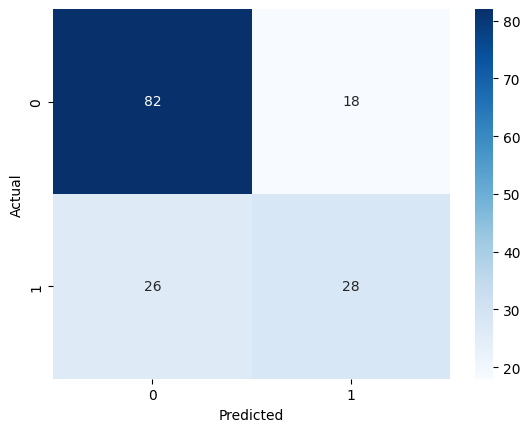

In [81]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [82]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall (Sensitivity):", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Accuracy: 0.7142857142857143
Precision: 0.6086956521739131
Recall (Sensitivity): 0.5185185185185185
F1 Score: 0.56
